# import libraries

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2


# define paths and Parameters

In [9]:
# Define paths
data_dir = 'output'
class_types = ['0_degrees', '90_degrees', '180_degrees', '270_degrees']

# Image parameters
img_height, img_width = 128, 128
batch_size = 32


# Create imageDataGen and Load Training Data

In [10]:
# Create an ImageDataGenerator for data augmentation and loading
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Log the number of training samples
print(f'Number of training samples: {train_generator.samples}')


Found 1328 images belonging to 4 classes.
Number of training samples: 1328


# Load Validation Data

In [11]:
# Load validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 328 images belonging to 4 classes.


# Define the CNN Model

In [26]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),


    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(class_types), activation='softmax')
])


# Compile the Model

In [27]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# Train the Model

In [28]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)


Epoch 1/15


2024-07-18 21:00:35.175014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-07-18 21:00:35.997684: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


41/42 [============================>.] - ETA: 0s - loss: 10.5162 - accuracy: 0.2500

2024-07-18 21:00:39.197003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


42/42 [==============================] - 4s 58ms/step - loss: 10.3614 - accuracy: 0.2545 - val_loss: 4.0086 - val_accuracy: 0.2500
Epoch 2/15
42/42 [==============================] - 2s 52ms/step - loss: 3.0419 - accuracy: 0.2658 - val_loss: 2.4705 - val_accuracy: 0.2500
Epoch 3/15
42/42 [==============================] - 2s 53ms/step - loss: 2.1729 - accuracy: 0.4631 - val_loss: 1.9957 - val_accuracy: 0.5823
Epoch 4/15
42/42 [==============================] - 2s 54ms/step - loss: 1.6295 - accuracy: 0.7199 - val_loss: 1.3325 - val_accuracy: 0.8049
Epoch 5/15
42/42 [==============================] - 2s 55ms/step - loss: 1.1115 - accuracy: 0.8569 - val_loss: 1.0705 - val_accuracy: 0.8171
Epoch 6/15
42/42 [==============================] - 2s 53ms/step - loss: 0.8860 - accuracy: 0.8938 - val_loss: 1.0738 - val_accuracy: 0.8506
Epoch 7/15
42/42 [==============================] - 2s 54ms/step - loss: 0.7330 - accuracy: 0.9375 - val_loss: 1.1257 - val_accuracy: 0.8354
Epoch 8/15
42/42 [=====

# Evaluate the Model

In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')


 3/11 [=======>......................] - ETA: 0s - loss: 1.2586 - accuracy: 0.8333

2024-07-18 21:01:16.890368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 0s 32ms/step - loss: 1.0933 - accuracy: 0.8445
Validation accuracy: 0.8445122241973877


# Save the Model

In [30]:
model.save('model.keras')


# Plot Training History

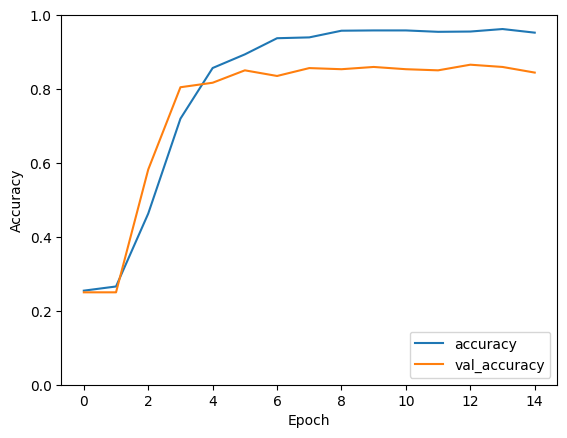

In [31]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
